In [1]:
from keras.utils import image_dataset_from_directory
import os

base_dir = os.path.expanduser("~/Desktop")

train_dir1 = os.path.join(base_dir, 'train1')
train_dir2 = os.path.join(base_dir, 'train2')
train_dir3 = os.path.join(base_dir, 'train3')
train_dir4 = os.path.join(base_dir, 'train5')
validation_dir = os.path.join(base_dir, 'train4')
test_dir = os.path.join(base_dir, 'test')

IMG_SIZE = 32
BATCH_SIZE = 128
train_dataset1 = image_dataset_from_directory(train_dir1, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
train_dataset2 = image_dataset_from_directory(train_dir2, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
train_dataset3 = image_dataset_from_directory(train_dir3, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
train_dataset4 = image_dataset_from_directory(train_dir4, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
validation_dataset = image_dataset_from_directory(validation_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')
test_dataset = image_dataset_from_directory(test_dir, image_size=(IMG_SIZE, IMG_SIZE), batch_size=BATCH_SIZE, label_mode='categorical')

Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [2]:
train_dataset = train_dataset1.concatenate(train_dataset2).concatenate(train_dataset3).concatenate(train_dataset4)

In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from keras import layers

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"), 
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.2), 
  ]
)

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)) 

# feature extraction
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x) 
x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation="relu")(x) 
x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation="relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x) 
x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation="relu")(x) 
x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation="relu")(x) 
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, padding='same', activation="relu")(x)
x = layers.Conv2D(filters=256, kernel_size=3, padding='same', activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# classification
x = layers.Flatten()(x)
x = Dropout(0.5)(x) 
x = layers.Dense(512, activation="relu")(x) 
x = Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x) 
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

In [5]:
import tensorflow as tf

#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(train_dataset, epochs=50, validation_data=validation_dataset)

Epoch 1/50


316/316 ━━━━━━━━━━━━━━━━━━━━ 255s 801ms/step - accuracy: 0.6693 - loss: 0.9501 - val_accuracy: 0.7103 - val_loss: 0.8334
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 160s 507ms/step - accuracy: 0.6799 - loss: 0.9097 - val_accuracy: 0.7288 - val_loss: 0.7837
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 161s 508ms/step - accuracy: 0.6857 - loss: 0.8980 - val_accuracy: 0.7135 - val_loss: 0.8243
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 161s 509ms/step - accuracy: 0.6916 - loss: 0.8950 - val_accuracy: 0.7248 - val_loss: 0.8045
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 160s 507ms/step - accuracy: 0.6941 - loss: 0.8654 - val_accuracy: 0.7207 - val_loss: 0.8525
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 161s 508ms/step - accuracy: 0.7055 - loss: 0.8474 - val_accuracy: 0.7385 - val_loss: 0.7815
Epoch 7/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 160s 506ms/step - accuracy: 0.7150 - loss: 0.8256 - val_accuracy: 0.7422 - val_loss: 0.7622
Epoch 8/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 161s 508ms/step - accuracy: 0.7179 - loss: 0.81

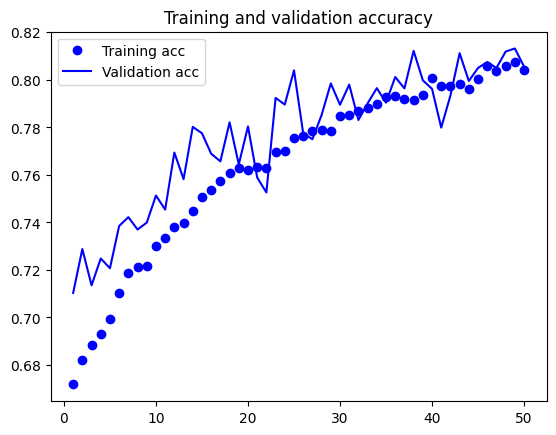

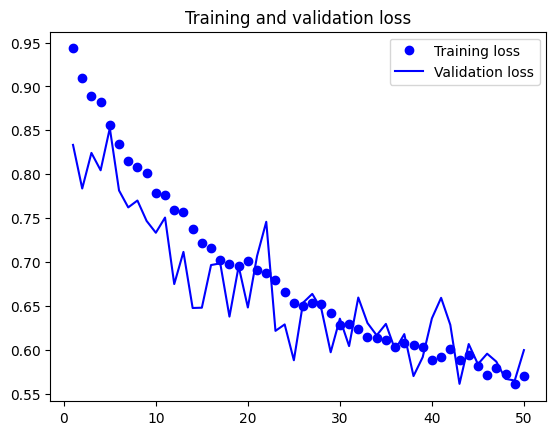

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_dataset)
print(test_acc)

79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - accuracy: 0.8072 - loss: 0.5939
0.8023999929428101


In [36]:
model.save('Modelo_S_32.h5')